<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#0336FF;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">EDA</p>
</div>


## **1 Analysis:**

1. Univariate Analysis
2. Multivariate Analysis

## **2 Feature Engineering:**

1. Creating new Columns
2. Modifying existing ones

## **3 Handling Outliers:**

1. Detect Outliers 
2. Remove Outliers

## **4 Conclusions.**

> #### **Note: Always remember that the entire Process of EDA is highly iterative!**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df = pd.read_csv('../input/titanic/train.csv')

In [3]:
# Previewing the data

df.shape

(891, 12)

In [4]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,S


In [5]:
# Check for missing values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Listing down the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### **Categorical Columns**

- Survived
- PClass
- Sex
- SibSp
- Parch
- Embarked

### **Numerical Columns**

- Age
- Fare
- PassengerId

### **Mixed Columns**

- Name
- Ticket
- Cabin

In [7]:
# Data type of cols

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **Few conclusions:**

1. Missing values in Age, Cabin and embarked columns.
2. More than 70 percent values are missing in cabin columns, will have to drop.
3. Few columns have inappropriated data types.

In [8]:
# Dropping cabin column

df.drop(columns= ['Cabin'], inplace = True)

In [9]:
# inputing missing values for embarked 
# finding the most appeared value in embarked column

df['Embarked'].value_counts()

# S it is 

df['Embarked'].fillna('S', inplace=True)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

#### **Changing data type for the following columns:**
- Survived (Category)
- PClass (Category)
- Sex (Category)
- Age (int)
- Embarked (Category)

In [11]:
# Handling Missing values
# Inputing missing values of age

# Strategy - mean

mean_value=df['Age'].mean()
df['Age'] = df['Age'].fillna(value=mean_value)

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


In [13]:
# Changing DataType of Columns: 

df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Age'] = df['Age'].astype('int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [15]:
# 5 Point Summary

df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# Maintain a copy of your data. This is just an important step in EDA

df_copy = df.copy()

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#0336FF;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">Univariate Analysis</p>
</div>


In [17]:
# Lets start with Survived column

(df['Survived'].value_counts()/df.shape[0])*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

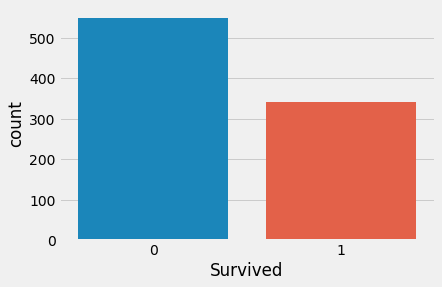

In [18]:
sns.countplot(x = df['Survived'])
plt.show()

# More people died(~62%) than survived(~38%)

In [19]:
# Pclass was the most crowded class

(df['Pclass'].value_counts()/df.shape[0])*100



# log soche honge ki Pclass 2 me travel karne se acha hum Pclass 1 me hi chale jate hai.
# by the way Pclass 3 sabse jyada crowded Class tha.

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

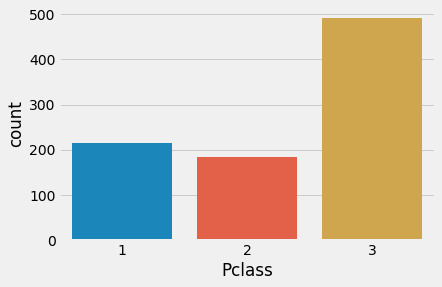

In [20]:
sns.countplot(df['Pclass'])
plt.show()

In [21]:
# Sex col

(df['Sex'].value_counts()/df.shape[0])*100


male      64.758698
female    35.241302
Name: Sex, dtype: float64

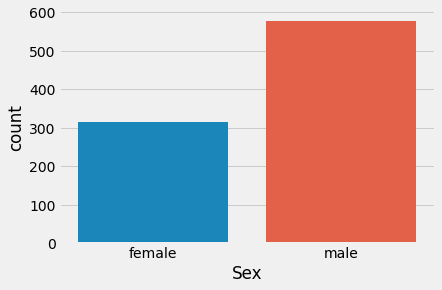

In [22]:
sns.countplot(df['Sex'])
plt.show()

In [23]:
# SibSp

df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

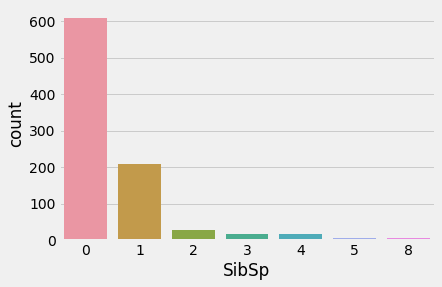

In [24]:
sns.countplot(df['SibSp'])
plt.show()

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


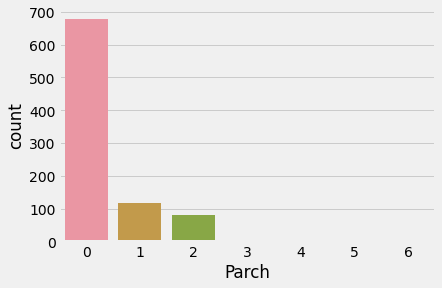

In [25]:
print((df['Parch'].value_counts()/df.shape[0])*100)
sns.countplot(df['Parch'])
plt.show()

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


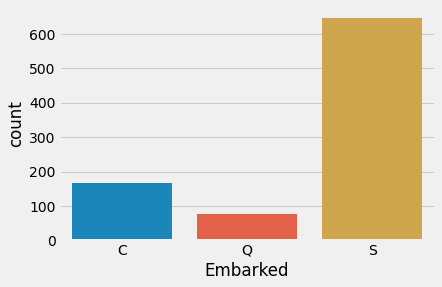

In [26]:
# Embarked

print((df['Embarked'].value_counts()/df.shape[0])*100)
sns.countplot(df['Embarked'])
plt.show()

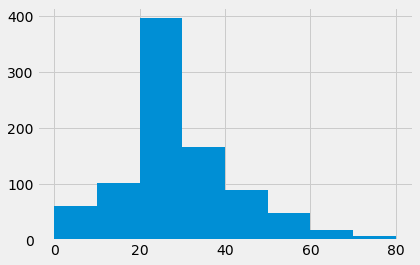

In [27]:
# Age col

plt.hist(df['Age'],bins=8)
plt.show()

0.45956263424701577
0.9865867453652877


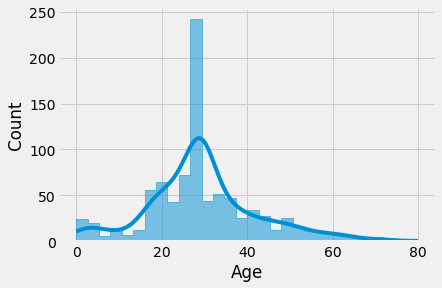

In [28]:
print(df['Age'].skew())
print(df['Age'].kurt())

sns.histplot(df['Age'], kde = True, element='step')
plt.show()
# element='step' is the Trick to plot this kind of graph

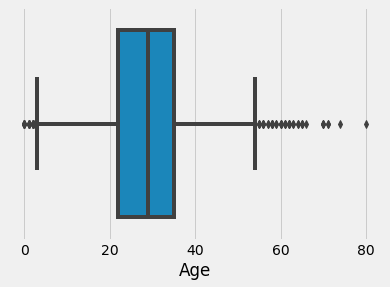

In [29]:
sns.boxplot(df['Age'])
plt.show()

In [30]:
# Just out of Curiosity: 

print("People with age in between 60 and 70 are: ", df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are: ", df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are: ", df[df['Age']>75].shape[0])
print('-'*50)

print("People with age in between 0 and 1 are: ", df[df['Age']<1].shape[0])

People with age in between 60 and 70 are:  15
People with age greater than 70 and 75 are:  6
People with age greater than 75 are:  1
--------------------------------------------------
People with age in between 0 and 1 are:  7


## Conclusion

- For all practical purposes age can be considered as normal distribution
- Deeper analysis is required for outlier detection

4.787316519674893
33.39814088089868


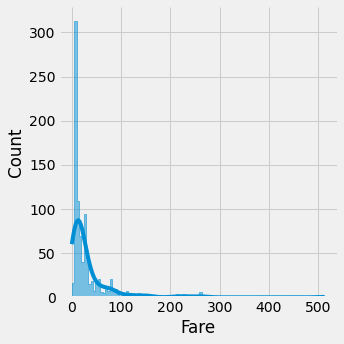

In [31]:
# Fare

sns.displot(df['Fare'], kde = True, element='step')
print(df['Fare'].skew())
print(df['Fare'].kurt())
plt.show()

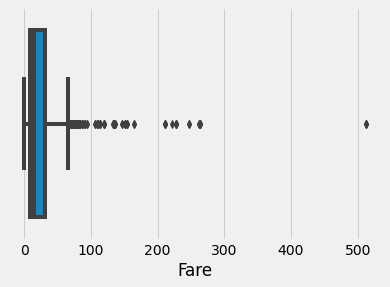

In [32]:
sns.boxplot(x = df['Fare'])
plt.show()

In [33]:
print("People witht fare in between $200 and $300: ",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People witht fare greater than $300: ",df[df['Fare']>300].shape[0])

People witht fare in between $200 and $300:  17
People witht fare greater than $300:  3


## **Conclusion:**
- Highly skewed data, a lot of people had cheaper tickets
- Outliers are there in the data

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#0336FF;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">Multivariate Analysis</p>
</div>


Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


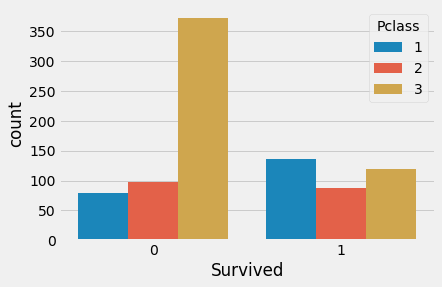

In [34]:
# Survival with Pclass

sns.countplot(x = df['Survived'], hue = df['Pclass'])

# creating a table called crosstab

pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis = 1)

# ye bata raha hai. ki Pclass 1 me 37 log mare hai. aur 63 log bache hai. and so on

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


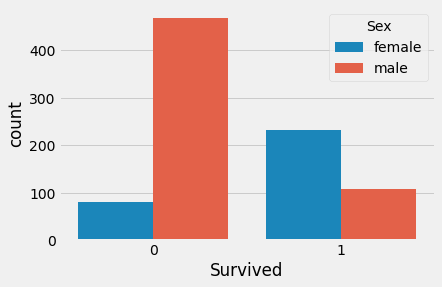

In [35]:
# Survival with Sex

sns.countplot(x = df['Survived'], hue = df['Sex'])
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis = 1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


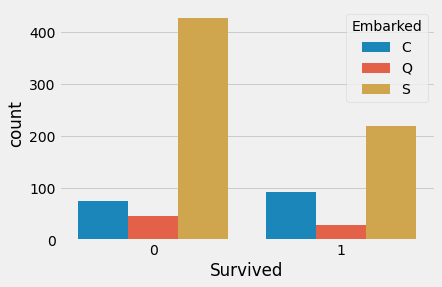

In [36]:
# Survival with Embarked 

sns.countplot(x = df['Survived'], hue = df['Embarked'])
pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis = 1)

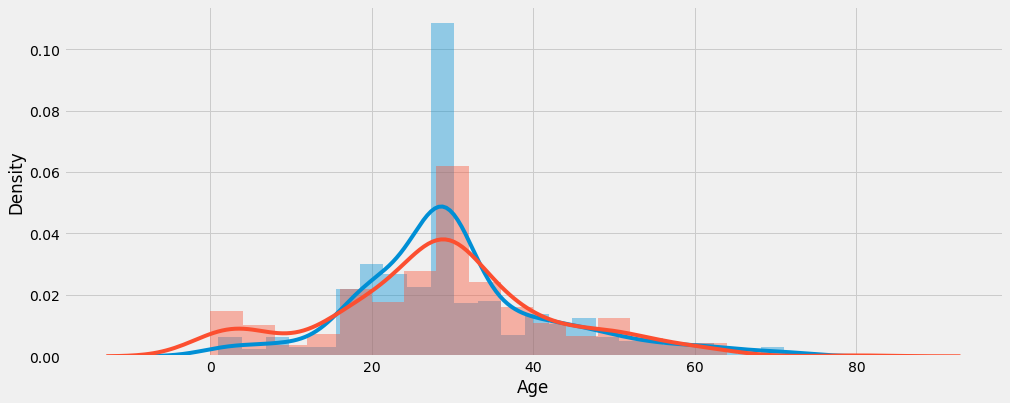

In [37]:
# Survived with Age

plt.figure(figsize = (15, 6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])
plt.show()

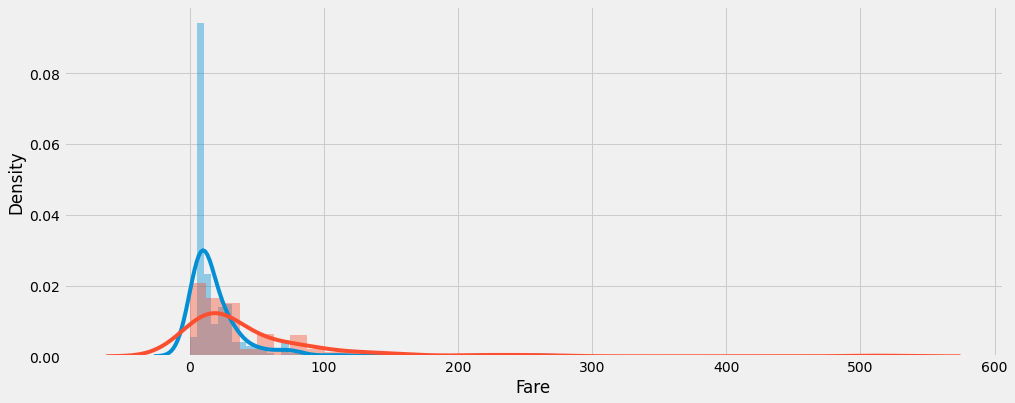

In [38]:
# Survived with Fare

plt.figure(figsize = (15, 6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])
plt.show()

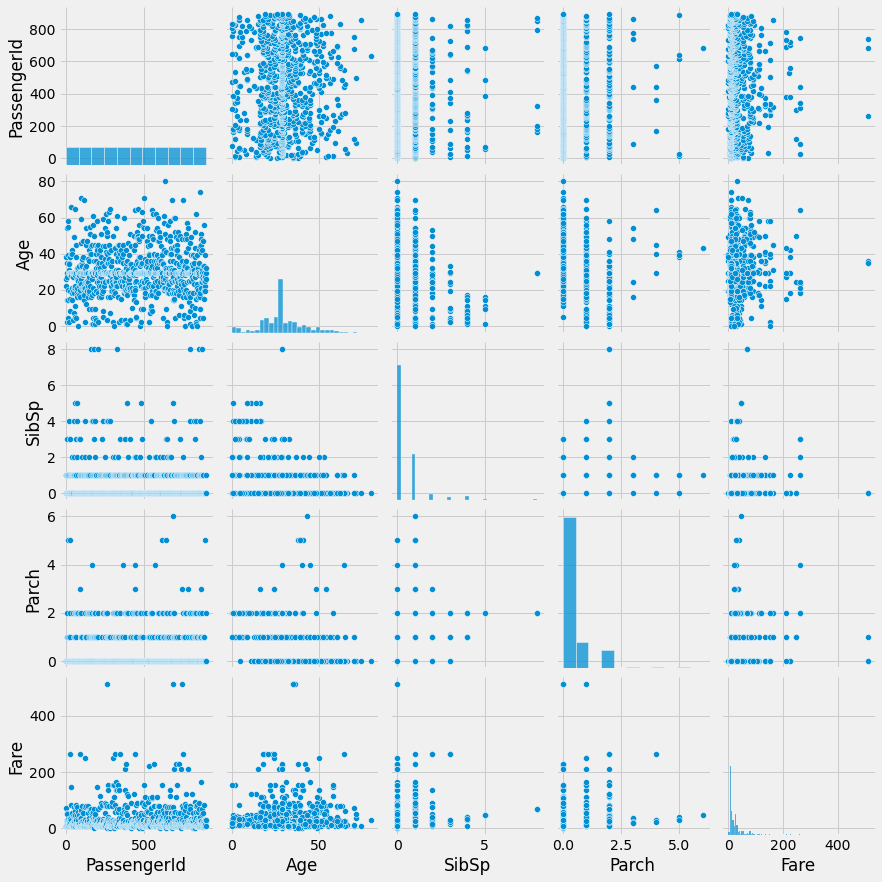

In [39]:
# You should always do pairplot:
sns.pairplot(df)
plt.show()

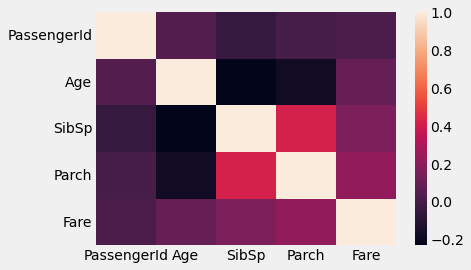

In [40]:
sns.heatmap(df.corr())
plt.show()

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#0336FF;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">Feature Engineering </p>
</div>


In [41]:
# We will create a new coclumn by the name of family which will be the sum of SibSp and Parch cols

df['family_size'] = df['Parch']+df['SibSp']

In [42]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,29,0,0,2631,7.2250,C,0
800,801,0,2,"Ponesell, Mr. Martin",male,34,0,0,250647,13.0000,S,0
771,772,0,3,"Jensen, Mr. Niels Peder",male,48,0,0,350047,7.8542,S,0
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16,5,2,CA 2144,46.9000,S,7


In [43]:
# Now we will engineer a new feature by the name of family type 

def family_type(number):
    if number==0:
        return 'Alone'
    elif number>0 and number<=4:
        return 'Medium'
    else:
        return 'Large'

In [44]:
df['family_type']= df['family_size'].apply(family_type)

In [45]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
412,413,1,1,"Minahan, Miss. Daisy E",female,33,1,0,19928,90.0000,Q,1,Medium
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1,0,2,2653,15.7417,C,2,Medium
881,882,0,3,"Markun, Mr. Johann",male,33,0,0,349257,7.8958,S,0,Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,Alone
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,29,0,0,PC 17585,79.2000,C,0,Alone


In [46]:
# Now we don't need SibSp, Parch and family_size
df.drop(columns=['SibSp', 'Parch', 'family_size'], inplace=True)

In [47]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35,36973,83.4750,S,Medium
343,344,0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25,244361,13.0000,S,Alone
889,890,1,1,"Behr, Mr. Karl Howell",male,26,111369,30.0000,C,Alone
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65,113509,61.9792,C,Medium
317,318,0,2,"Moraweck, Dr. Ernest",male,54,29011,14.0000,S,Alone


In [48]:
# Now, lets analyze survived with family type:

pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis = 1)

# So, people traveling alone around 70% mar gae. 
# Large family ke saath travel kar rahe 85% mar gae.

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#0336FF;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">Handling Outliers</p>
</div>

## **Numerical Data**

- if the data is following normal distribution, anything beyound 3*SD - mean+ 3*SD can be considered as an outlier.(This is a formula '3 time standerd deviation wala')
- if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 IQR and Q3 + 1.5 IQR (This is also a formula to detect outlier Q means Quartile)

## **Categorical Data**

- if the col in highly imbailanced for e.g. male 10000 and female 2 then we can eliminate female

In [49]:
# Handling Outliers in age (Almost normal)

df = df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 10)

In [50]:
# Handling outliers from Fare column

# Finding quartiles

Q1 = np.percentile(df['Fare'], 25)
Q3 = np.percentile(df['Fare'], 75)

outlier_low = Q1 - 1.5 * (Q3 - Q1)
outlier_high = Q3 + 1.5 * (Q3 - Q1)

df = df[(df['Fare']> outlier_low) & (df['Fare']<outlier_high)]

In [51]:
# One hot encoding (isse hum categorical column ko numerical column me badalte hai)
# e.g., male aur female = 0, 1
# lekin isme aisa nahi hoga. agar 3 column hai. mumbai, kolkata, chennai
# to bajae 0, 1, 2 likhne ke hum mumbai ke liye '1 0 0' likh sakte hai.
# aur ek step aage badhe to 1 aur 0 ko rakh ke last wale zero ko drop kar sakte hai.
# to yahi karne wale hai. jitne bhi column banenge uska pahla column hata denge.

# following chart me Pclass 1 drop ho gaya, Sex_female aur Embarked_C aur family_type_alone bhi drop ho gaye.
df.sample(4)

# Cols to be transformed are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=df, columns=['Pclass', 'Sex', 'Embarked', 'family_type'], drop_first = True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,0,1,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,0,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,0,1,1,0,1,0,0
5,6,0,"Moran, Mr. James",29,330877,8.4583,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,1,0,1,0,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,0,0,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,0,1,0,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,0,0,1,0,0,0,0


In [52]:
df = pd.get_dummies(data= df, columns = ['Pclass', 'Sex', 'Embarked', 'family_type'], drop_first= True)

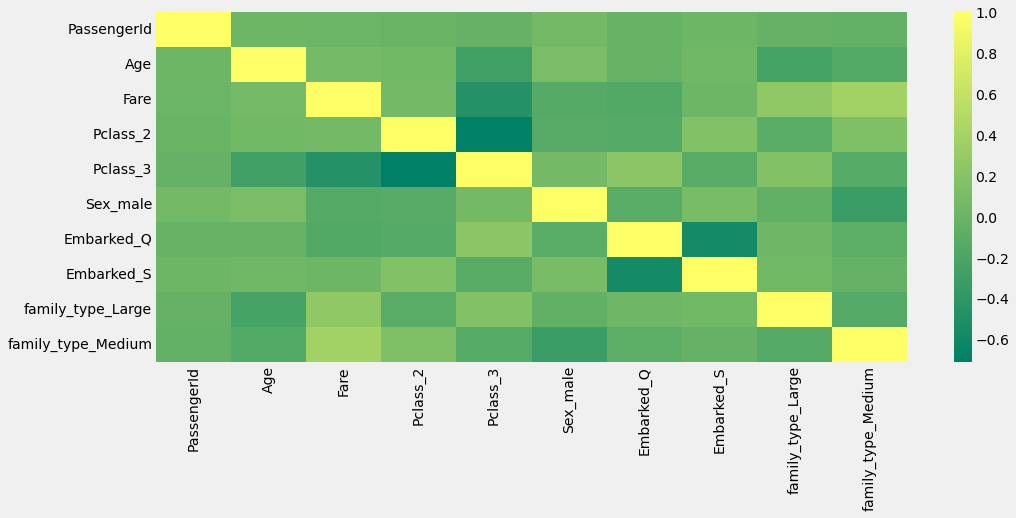

In [53]:
# AB phir se corrilation ke oopar ek Heatmap draw karenge. 
# ab jyada numerical column hai to heatmap jyada cheej bataega.

plt.figure(figsize = (15, 6))
sns.heatmap(df.corr(), cmap = 'summer')
plt.show()

# Conclusions: 
# Family_type_medium ka Fare ke saath positive corrilation hai.
# Family_type_large jyadatar Pclass_3 me travel kar rahe hai.

## **Drawing Conclusions**

- Chance of female survival is higher than male survival
- Travelling in Pclass 3 was deadliest 
- Somehow, people going to C survived more 
- People in the age range of 20 to 40 had a higher chance of not surviving 
- People travelling with smaller families had a higher chance of surviving the accident in comparison to people with large families and travelling alone.

#### **Thanks a lot for having a look at this notebook. If you found this notebook useful, consider ✨**Upvoting**✨**, 

##### **If you have any idea/suggestions about this notebook, please leave a comment!**

##### **Thank you all for your reading and support!**
##### **HAPPY LEARNING :)**